In [14]:
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import os

In [3]:
loss_dir = 'logs/losses'
name = 'STLSTM*'

files = glob.glob(os.path.join(loss_dir, name))

In [4]:
files

['logs/losses/STLSTM_t32_d_7_ep14_l1.npy']

In [17]:
DF = pd.DataFrame()
for file in files:
    losses = np.load(file)
    df = pd.DataFrame({'depth':np.repeat(0,len(losses)), 'loss':losses})
    DF = DF.append(df)

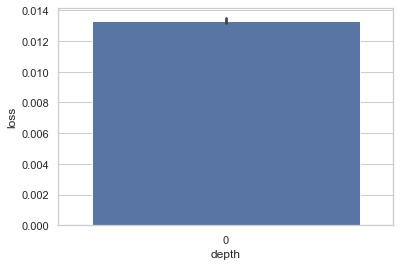

In [18]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="depth", y="loss", data=DF)